## Observations and Insights 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice.
num_mice = combined_mouse_study["Mouse ID"].nunique()
num_mice

249

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_study.loc[combined_mouse_study.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()


array(['g989'], dtype=object)

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_mouse_study.loc[combined_mouse_study["Mouse ID"] == 'g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = combined_mouse_study.loc[combined_mouse_study["Mouse ID"] != 'g989']
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Checking the number of mice in the clean DataFrame.
clean_mice["Mouse ID"].nunique()

248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

dt_mean = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
dt_median = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
dt_variance = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
dt_std = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
dt_sem = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame()
summary_df["Mean"] = dt_mean
summary_df["Median"] = dt_median
summary_df["Variance"] = dt_variance
summary_df["STD"] = dt_std
summary_df["SEM"] = dt_sem

summary_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean="mean", Median="median", Variance="var", SDEV="std", SEM= "sem")
pd.DataFrame(tumor_vol)
tumor_vol

,Mean,Median,Variance,SDEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<BarContainer object of 10 artists>

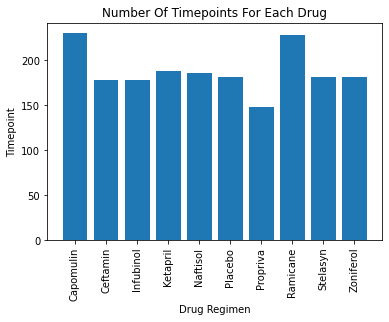

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

tp_per_drug = pd.DataFrame(clean_mice.groupby(["Drug Regimen"])["Timepoint"].count()).reset_index()

x_values = tp_per_drug["Drug Regimen"].values
y_values = tp_per_drug["Timepoint"].values

plt.title("Number Of Timepoints For Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.xticks(rotation='vertical')

plt.bar(x_values,y_values)

Text(0, 0.5, 'Timepoints')

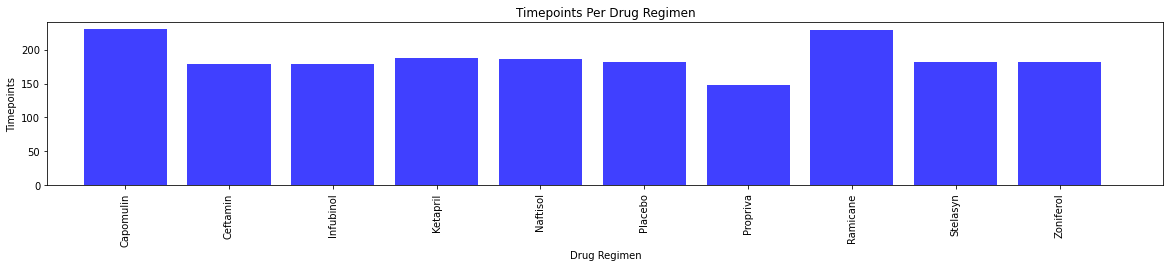

In [53]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(tp_per_drug["Drug Regimen"]))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, tp_per_drug["Timepoint"], color='b', alpha=0.75, align="center")
plt.xticks(tick_locations, tp_per_drug["Drug Regimen"], rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(tp_per_drug["Timepoint"])+10)

plt.title("Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

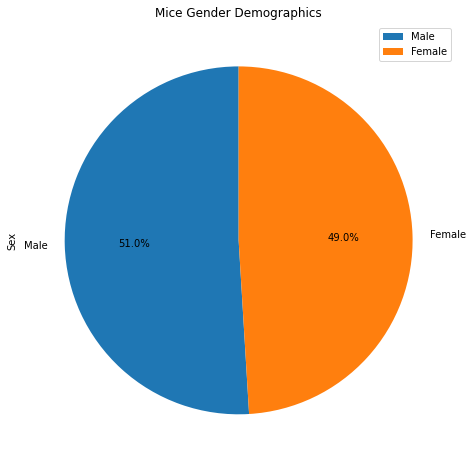

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

f_demo = len(clean_mice.loc[clean_mice["Sex"] == "Female"])
m_demo = len(clean_mice.loc[clean_mice["Sex"] == "Male"])

gender_df = pd.DataFrame(clean_mice["Sex"].value_counts())
gender_df.plot(kind='pie', subplots=True, figsize=(8, 8), startangle = 90, autopct='%1.1f%%')

plt.title("Mice Gender Demographics")

#show the plot
plt.show()

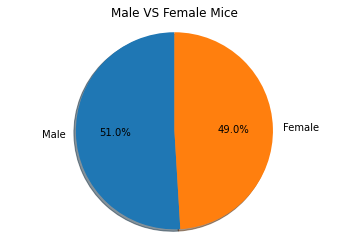

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

f_demo = len(clean_mice.loc[clean_mice["Sex"] == "Female"])
m_demo = len(clean_mice.loc[clean_mice["Sex"] == "Male"])

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [m_demo, f_demo]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title("Male VS Female Mice")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol = last_timepoint.merge(clean_mice, on=["Mouse ID", "Timepoint"])
final_tumor_vol 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
grouped = final_tumor_vol.groupby("Drug Regimen")

for drug in treatments:
    tumor_vols = grouped.get_group(drug)["Tumor Volume (mm3)"]
    #display(tumor_vols)
    tumor_vols.sort_values()
    tumor_vol_data.append(tumor_vols)
    quartiles = tumor_vols.quantile([.25,0.5,0.75])
    #print(quartiles)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    iqr = quartiles.loc[0.75] - quartiles.loc[.25]
    lower_bound = quartiles.loc[0.25] - (iqr * 1.5)
    upper_bound = quartiles.loc[0.75] + (iqr * 1.5)
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vols[(tumor_vols<lower_bound)|(tumor_vols>upper_bound)]
    for outlier in outliers:
        print(outlier)
        print(drug)

36.321345799999996
Infubinol


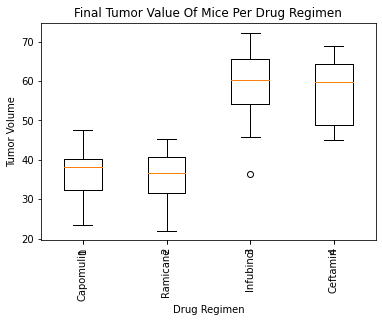

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title("Final Tumor Value Of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],rotation='vertical')
plot=plt.boxplot(tumor_vol_data)

## Line and Scatter Plots

<BarContainer object of 10 artists>

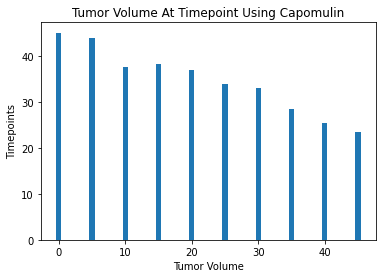

In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin"]
capomulin_mice_df =  pd.DataFrame(capomulin_mice[["Tumor Volume (mm3)","Timepoint"]])

next_capomulin_mouse = capomulin_mice.iloc[0]["Mouse ID"]
next_capomulin_mouse_df = capomulin_mice[capomulin_mice["Mouse ID"] == next_capomulin_mouse][["Timepoint","Tumor Volume (mm3)"]]

# Show the graph that we have created
next_capomulin_mouse_df.set_index("Timepoint", drop = True)

x_values = next_capomulin_mouse_df["Timepoint"].values
y_values = next_capomulin_mouse_df["Tumor Volume (mm3)"].values

plt.title("Tumor Volume At Timepoint Using Capomulin")
plt.xlabel("Tumor Volume")
plt.ylabel("Timepoints")

plt.bar(x_values,y_values)

correlation coeficcient 0.9505243961855269


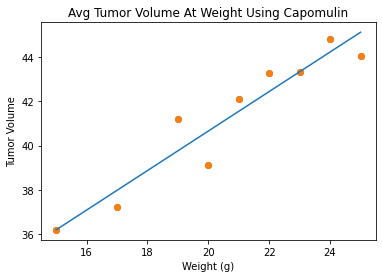

In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tv_weight_mean = capomulin_mice.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
tv_weight_mean

x_values = tv_weight_mean.index
y_values = tv_weight_mean.values

plt.title("Avg Tumor Volume At Weight Using Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")

plt.scatter(x_values,y_values)

r = pearsonr(x_values,y_values)[0]
model = linregress(x_values,y_values)
trendline =x_values * model[0] + model[1]

plt.scatter(x_values,y_values)
plt.plot(x_values,trendline)
print(f"correlation coeficcient {r}")

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capo_tv_weight_mean = capomulin_mice.groupby("Weight (g)")[["Tumor Volume (mm3)"]].mean()
capo_tv_weight_mean

,Tumor Volume (mm3)
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109
